In [105]:
import pandas as pd
pd.read_csv("data_info.csv")

column  \
0                             user_id   
1               subscription_duration   
2                   recent_login_time   
3                  average_login_time   
4   average_time_per_learning_session   
5        monthly_active_learning_days   
6             total_completed_courses   
7         recent_learning_achievement   
8         abandoned_learning_sessions   
9          community_engagement_level   
10         preferred_difficulty_level   
11                  subscription_type   
12           customer_inquiry_history   
13                    payment_pattern   
14                             target   

                                          description  
0                                         사용자의 고유 식별자  
1                                사용자가 서비스에 가입한 기간 (월)  
2                              사용자가 마지막으로 로그인한 시간 (일)  
3                                    사용자의 일반적인 로그인 시간  
4                              각 학습 세션에 소요된 평균 시간 (분)  
5                                       월간 활동적인 학습 일수  
6                                          완료한 총 코스 수  
7                                           최근 학습 성취도  
8                                         중단된 학습 세션 수  
9                                            커뮤니티 참여도  
10                                           선호하는 난이도  
11                                              구독 유형  
12                                           고객 문의 이력  
13  \n    사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.\n    ...  
14       사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냅니다.

In [106]:
# 불러오기
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# print(train.shape, test.shape) --> (10000, 15) (10000, 14)

<Axes: >

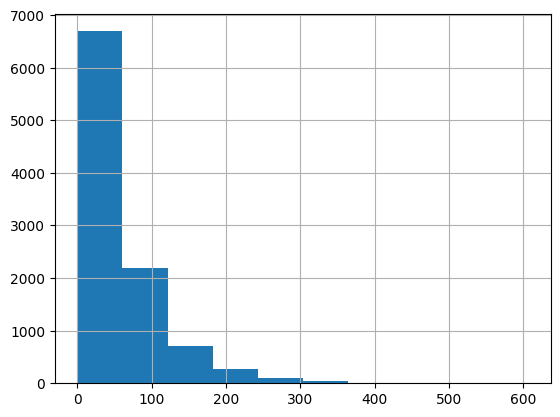

In [107]:
# EDA
train = train.drop("user_id", axis=1)
test_id = test.pop("user_id")
target = train.pop("target")
obj = train.select_dtypes("object").columns
# print(train.shape, test.shape) --> (10000, 13) (10000, 13)
# print(train.isnull().sum(), test.isnull().sum()) --> (10000, 13) (10000, 13)
# display(train.describe(), test.describe())
# display(train.describe(include="O"), test.describe(include="O"))
# preferred_difficulty_leve,  subscription_type --> label
# average_time_per_learning_session --> log
test['average_time_per_learning_session'].hist()

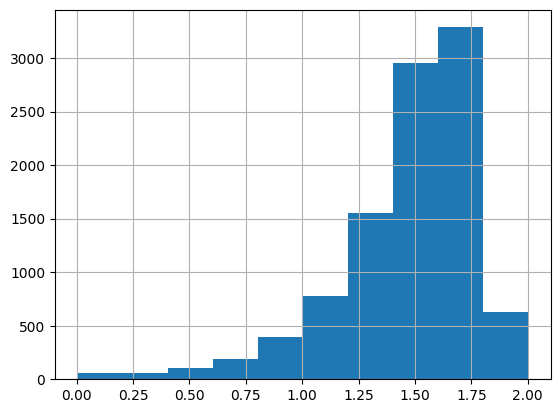

In [108]:
# 전처리
train['average_time_per_learning_session'] = np.log1p(train['average_time_per_learning_session'])
test['average_time_per_learning_session'] = np.log1p(test['average_time_per_learning_session'])
np.log1p(test['average_time_per_learning_session']).hist()

for o in obj:
  le = LabelEncoder()
  train[o] = le.fit_transform(train[o])
  test[o] = le.transform(test[o])

In [109]:
# 검증
x_tr, x_te, y_tr, y_te = train_test_split(train, target, test_size=0.2, random_state=1004)
# print(x_tr.shape, x_te.shape, y_tr.shape, y_te.shape) --> (8000, 13) (2000, 13) (8000,) (2000,)
#--------------------------------------------------------------------------------------------------
# model1 = XGBClassifier(random_state=1004)
# model1.fit(x_tr, y_tr)
# pred = model1.predict(x_te)
# print(f1_score(y_te, pred, average='macro')) --> 0.511469062751114
#--------------------------------------------------------------------------------------------------
# model2 = RandomForestClassifier(random_state=1004)
# model2.fit(x_tr, y_tr)
# pred = model2.predict(x_te)
# print(f1_score(y_te, pred, average='macro')) --> 0.46178450513381275
#--------------------------------------------------------------------------------------------------
model3 = DecisionTreeClassifier(random_state=1004)
model3.fit(x_tr, y_tr)
# pred = model3.predict(x_te)
# print(f1_score(y_te, pred, average='macro')) --> 0.5270466552850682

DecisionTreeClassifier(random_state=1004)

In [110]:
# 평가
pred = model3.predict(test)
result = pd.DataFrame({
    "user_id":test_id,
    "target":pred
})
result.to_csv("result.csv", index=False)
# pd.read_csv("result.csv")